In [1]:
import sys

sys.path.append('app/trailsapp')

import importlib
import analyze

/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:195: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  summary['modes_string'] = ",".join([ "%.5lg"%m['time_fraction_pc'] for n, m in sorted(summary['modes'].items(), key=lambda x:x[1]['order']) if n is not "all"])
/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:414: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  activity['analysis']['modes_string'] = ",".join([ "%.5lg"%m['time_fraction_pc'] for n, m in sorted(activity['analysis']['modes'].items(), key=lambda x:x[1]['order']) if n is not "all"])


In [30]:
import gpxpy

# gpx = gpxpy.parse(open("data/1340065/COURSE_257330860.gpx").read())
gpx = gpxpy.parse(open("/home/savchenk/activity_14612787273.gpx").read())

In [29]:
gpx.

TimeBounds(start_time=datetime.datetime(2024, 3, 30, 21, 2, 45, tzinfo=SimpleTZ('Z')), end_time=datetime.datetime(2024, 3, 30, 21, 9, 34, 406000, tzinfo=SimpleTZ('Z')))

found step 0.19995
found step 2.69659
total time 0.6436111111111111 hr


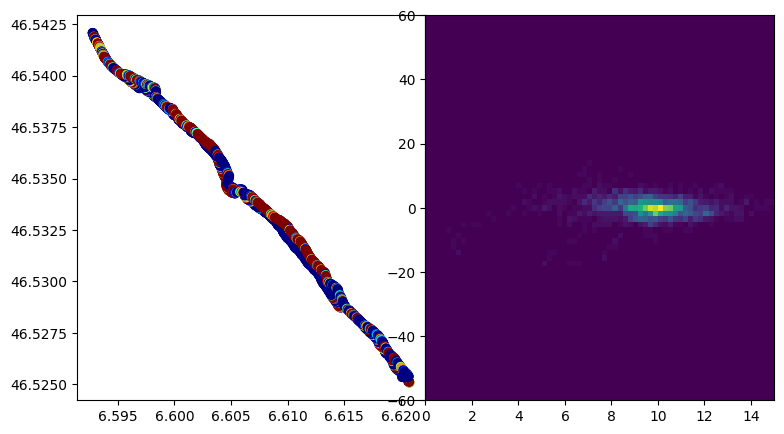

In [22]:
importlib.reload(analyze)
# analyze.produce_lut(gpx)
lut = analyze.produce_merged_lut([gpx])

None run trail
plotting
total distance 6.25 km
cumulative elevation gain -5.10 m
total elevation gain 91.60 m
total time 1.21
run flat    99.4% time 1.21 hr 6.22 km -6.30 
walk up      0.5% time 0.01 hr 0.02 km 2.20 
steep up     0.1% time 0.00 hr 0.01 km 0.00 
down steep   0.0% time 0.00 hr 0.00 km 0.00 
all        100.0% time 1.21 hr 6.25 km -4.10 


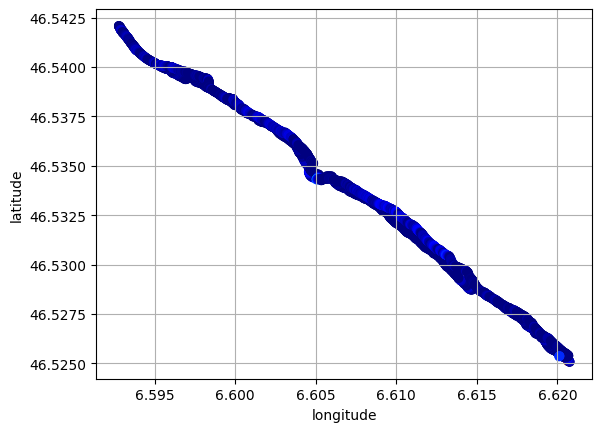

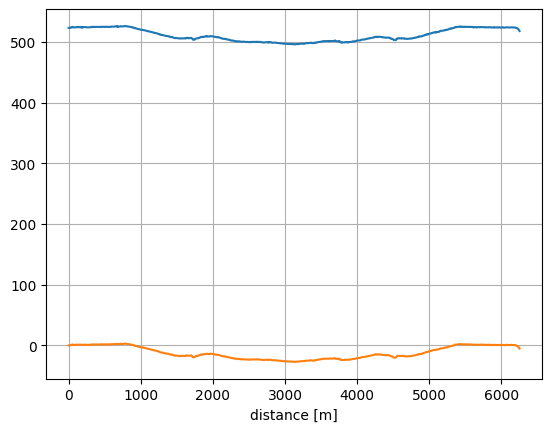

In [10]:
importlib.reload(analyze)

_ = analyze.analyze_route(dict(
    route_points=gpx.tracks[0].segments[0].points,
    route_gpx=gpx,
    type='run',
    sub_type='trail',
),
    plot=True,
    # lut_merged=lut,
)

In [33]:
np.load(open("lut_merged.npy", "rb"), allow_pickle=True)[1]

array([ 0.        ,  0.2173913 ,  0.43478261,  0.65217391,  0.86956522,
        1.08695652,  1.30434783,  1.52173913,  1.73913043,  1.95652174,
        2.17391304,  2.39130435,  2.60869565,  2.82608696,  3.04347826,
        3.26086957,  3.47826087,  3.69565217,  3.91304348,  4.13043478,
        4.34782609,  4.56521739,  4.7826087 ,  5.        ,  5.2173913 ,
        5.43478261,  5.65217391,  5.86956522,  6.08695652,  6.30434783,
        6.52173913,  6.73913043,  6.95652174,  7.17391304,  7.39130435,
        7.60869565,  7.82608696,  8.04347826,  8.26086957,  8.47826087,
        8.69565217,  8.91304348,  9.13043478,  9.34782609,  9.56521739,
        9.7826087 , 10.        , 10.2173913 , 10.43478261, 10.65217391,
       10.86956522, 11.08695652, 11.30434783, 11.52173913, 11.73913043,
       11.95652174, 12.17391304, 12.39130435, 12.60869565, 12.82608696,
       13.04347826, 13.26086957, 13.47826087, 13.69565217, 13.91304348,
       14.13043478, 14.34782609, 14.56521739, 14.7826087 , 15.  

7.94196181167817
9.60346577160253


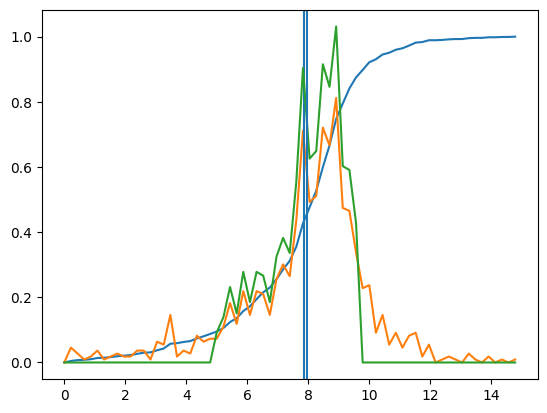

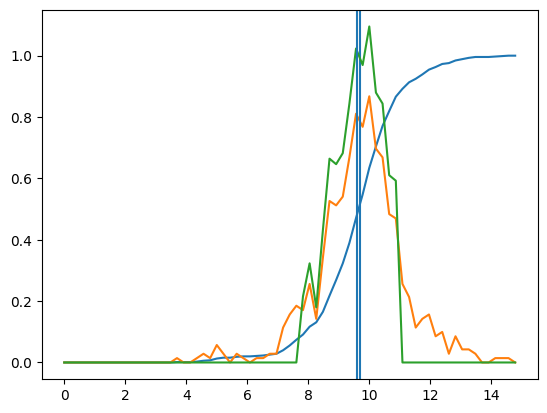

In [63]:
import numpy as np

merged_lut = np.load(open("lut_merged_prod.npy", "rb"), allow_pickle=True)

print(analyze.speed_estim_for_grade(0, merged_lut, plot=True))
print(analyze.speed_estim_for_grade(0, lut, plot=True))

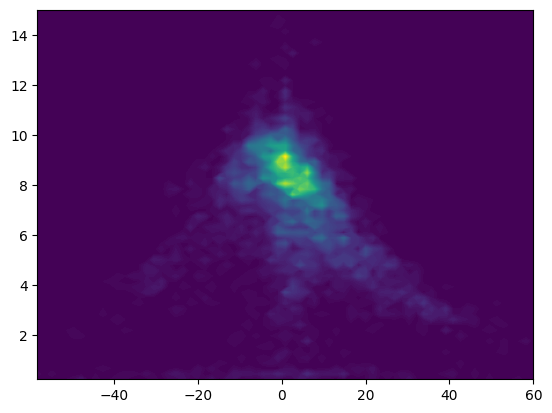

In [64]:
import matplotlib.pyplot as plt

plt.contourf(merged_lut[2][1:], merged_lut[1][1:], merged_lut[0], levels=100)

In [49]:
np.abs(lut[2]).argmin()

34